In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE

In [3]:
steps = pd.read_csv('../data/robotanik/task639.csv')
steps.trace = steps.trace.map(lambda t: frozenset(eval(t)))
print(len(steps))
steps.head()

11683


,user,game,step,time,correct,code,trace
0,2,1,1,31,False,_FbL_1|||||,"((5, 9), (2, 6), (5, 11), (7, 12), (2, 8), (4,..."
1,2,1,2,25,False,_FbLr2_1|_FbR_2||||,"((5, 9), (7, 12), (2, 8), (9, 8), (7, 7), (4, ..."
2,2,1,3,15,False,_FbLr2_1|_RbFbR_2||||,"((5, 9), (2, 6), (5, 11), (4, 5), (2, 8), (2, ..."
3,2,1,4,10,False,_FbLr2_1|_R_FbR_2||||,"((5, 9), (2, 6), (5, 11), (4, 5), (2, 8), (2, ..."
4,2,1,5,9,False,_FbLr2_1|rR_FbR_2||||,"((5, 9), (7, 3), (2, 6), (5, 11), (4, 5), (2, ..."


## Numbers of unique codes and traces

In [48]:
codes = steps.code.value_counts()
print('number of unique codes:', len(codes))
#codes[codes >= 20].plot.barh()
#codes.head()

number of unique codes: 5509


In [49]:
traces = steps.trace.value_counts()
print('number of unique traces:', len(traces))
# traces[traces >= 50].plot.barh()

number of unique traces: 141


## t-SNE

In [50]:
def jaccard_distance(setA, setB):
    """ Distance between two sets

    >>> jaccard_distance({1, 2}, {1, 2})
    0.0
    >>> jaccard_distance({1, 2}, {3, 4})
    1.0
    >>> jaccard_distance({1, 2, 3}, {1, 2, 4, 5})
    0.6
    """
    intersection_size = len(setA & setB)
    union_size = len(setA | setB)
    distance = (1 - intersection_size / union_size) if union_size > 0 else 0.
    return distance

In [36]:
n = 400 # len(steps)
distances = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        distances[i,j] = jaccard_distance(steps.trace[i], steps.trace[j])

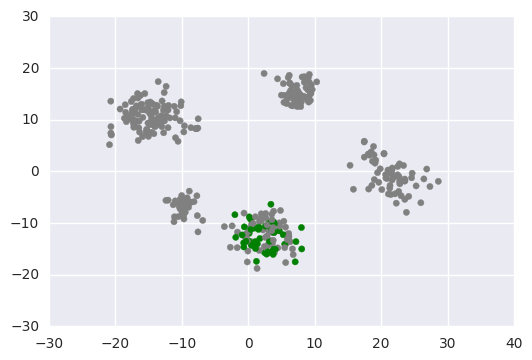

In [47]:
tsne = TSNE(perplexity=50, learning_rate=1000, metric='precomputed')
emb = pd.DataFrame(tsne.fit_transform(distances))
plt.scatter(emb[0], emb[1], color=steps.correct.map(lambda c: 'green' if c else 'gray'))